In [ ]:
# Importing essential librarries
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

In [ ]:
path = "/content/IMDB-Movie-Data - IMDB-Movie-Data.csv"
df = pd.read_csv(path)
df.head()

,Rank,Title,Genre,Director,Movie category,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,Hollywood,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,Hollywood,2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,Hollywood,2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,Hollywood,2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,Hollywood,2016,123,6.2,393727,325.02,40.0


# ***Understanding the dataset ***

In [ ]:
df.tail()

,Rank,Title,Genre,Director,Movie category,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery",Billy Ray,Hollywood,2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Eli Roth,Hollywood,2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu,Hollywood,2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",Scot Armstrong,Hollywood,2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",Barry Sonnenfeld,Hollywood,2016,87,5.3,12435,19.64,11.0


In [ ]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Director', 'Movie category', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
df.nunique()

Rank                  1000
Title                  999
Genre                  207
Director               644
Movie category           2
Year                    11
Runtime (Minutes)       94
Rating                  55
Votes                  997
Revenue (Millions)     814
Metascore               84
dtype: int64

In [ ]:
df.shape

(1000, 11)

# ***Data Cleaning has done previously in Ms Excel. Due to the absence of some values in Revenue section or Metascore section, we are leaving the data as it is. ***

## Removing Outliers

<Axes: >

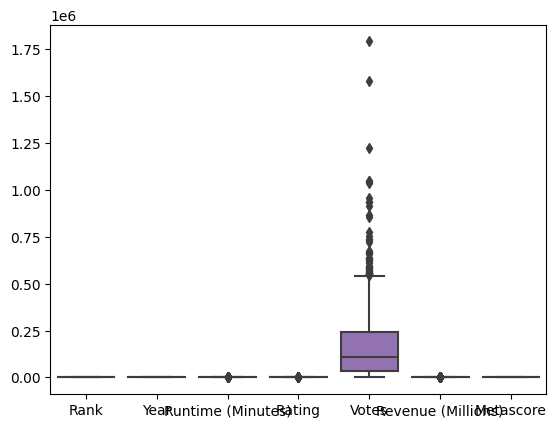

In [ ]:
sns.boxplot(data = df)

In [ ]:
# Removing Outliers from Votes columns
q1 = np.percentile(df['Votes'], [25])
q3 = np.percentile(df['Votes'], [75])
iqr = q3-q1
lower = q1-1.5*iqr
higher = q3+1.5*iqr
print(lower)
print(higher)

[-269092.125]
[545310.875]


In [ ]:
cd = np.array(df['Votes'])

In [ ]:
upper_array = np.where(cd>=higher) [0]
lower_array = np.where(cd<=lower) [0]
df.drop(index = upper_array, inplace = True)
df.drop(index = lower_array, inplace = True)

<Axes: >

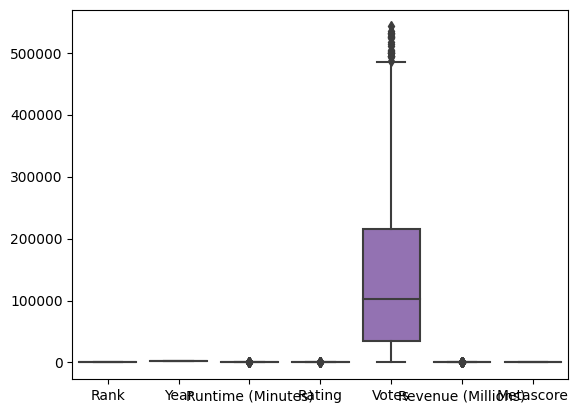

In [ ]:
sns.boxplot(data = df)

# **Data Visualization**

<ipython-input-3-16ba7720eafe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds = df.corr()


Co-relation:                          Rank      Year  Runtime (Minutes)    Rating     Votes  \
Rank                1.000000 -0.261605          -0.221739 -0.219555 -0.283876   
Year               -0.261605  1.000000          -0.164900 -0.211219 -0.411904   
Runtime (Minutes)  -0.221739 -0.164900           1.000000  0.392214  0.407062   
Rating             -0.219555 -0.211219           0.392214  1.000000  0.511537   
Votes              -0.283876 -0.411904           0.407062  0.511537  1.000000   
Revenue (Millions) -0.271592 -0.126790           0.267953  0.217654  0.639661   
Metascore          -0.191869 -0.079305           0.211978  0.631897  0.325684   

                    Revenue (Millions)  Metascore  
Rank                         -0.271592  -0.191869  
Year                         -0.126790  -0.079305  
Runtime (Minutes)             0.267953   0.211978  
Rating                        0.217654   0.631897  
Votes                         0.639661   0.325684  
Revenue (Millions)       

<Axes: >

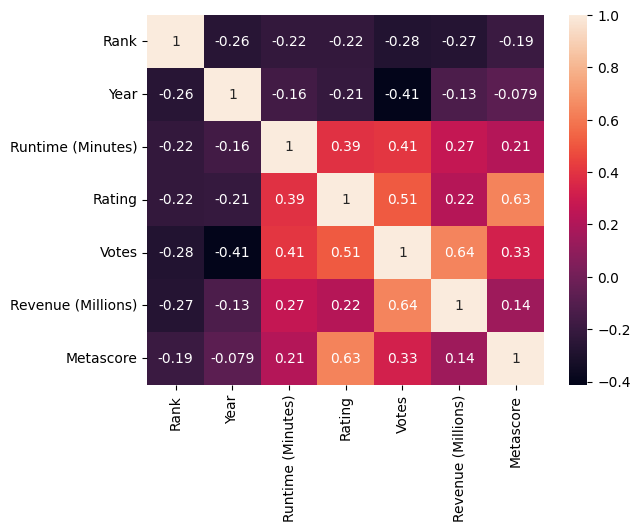

In [ ]:
# Co-relation and heatmap
ds = df.corr()
print("Co-relation: ",  ds)
sns.heatmap(ds, annot = True)

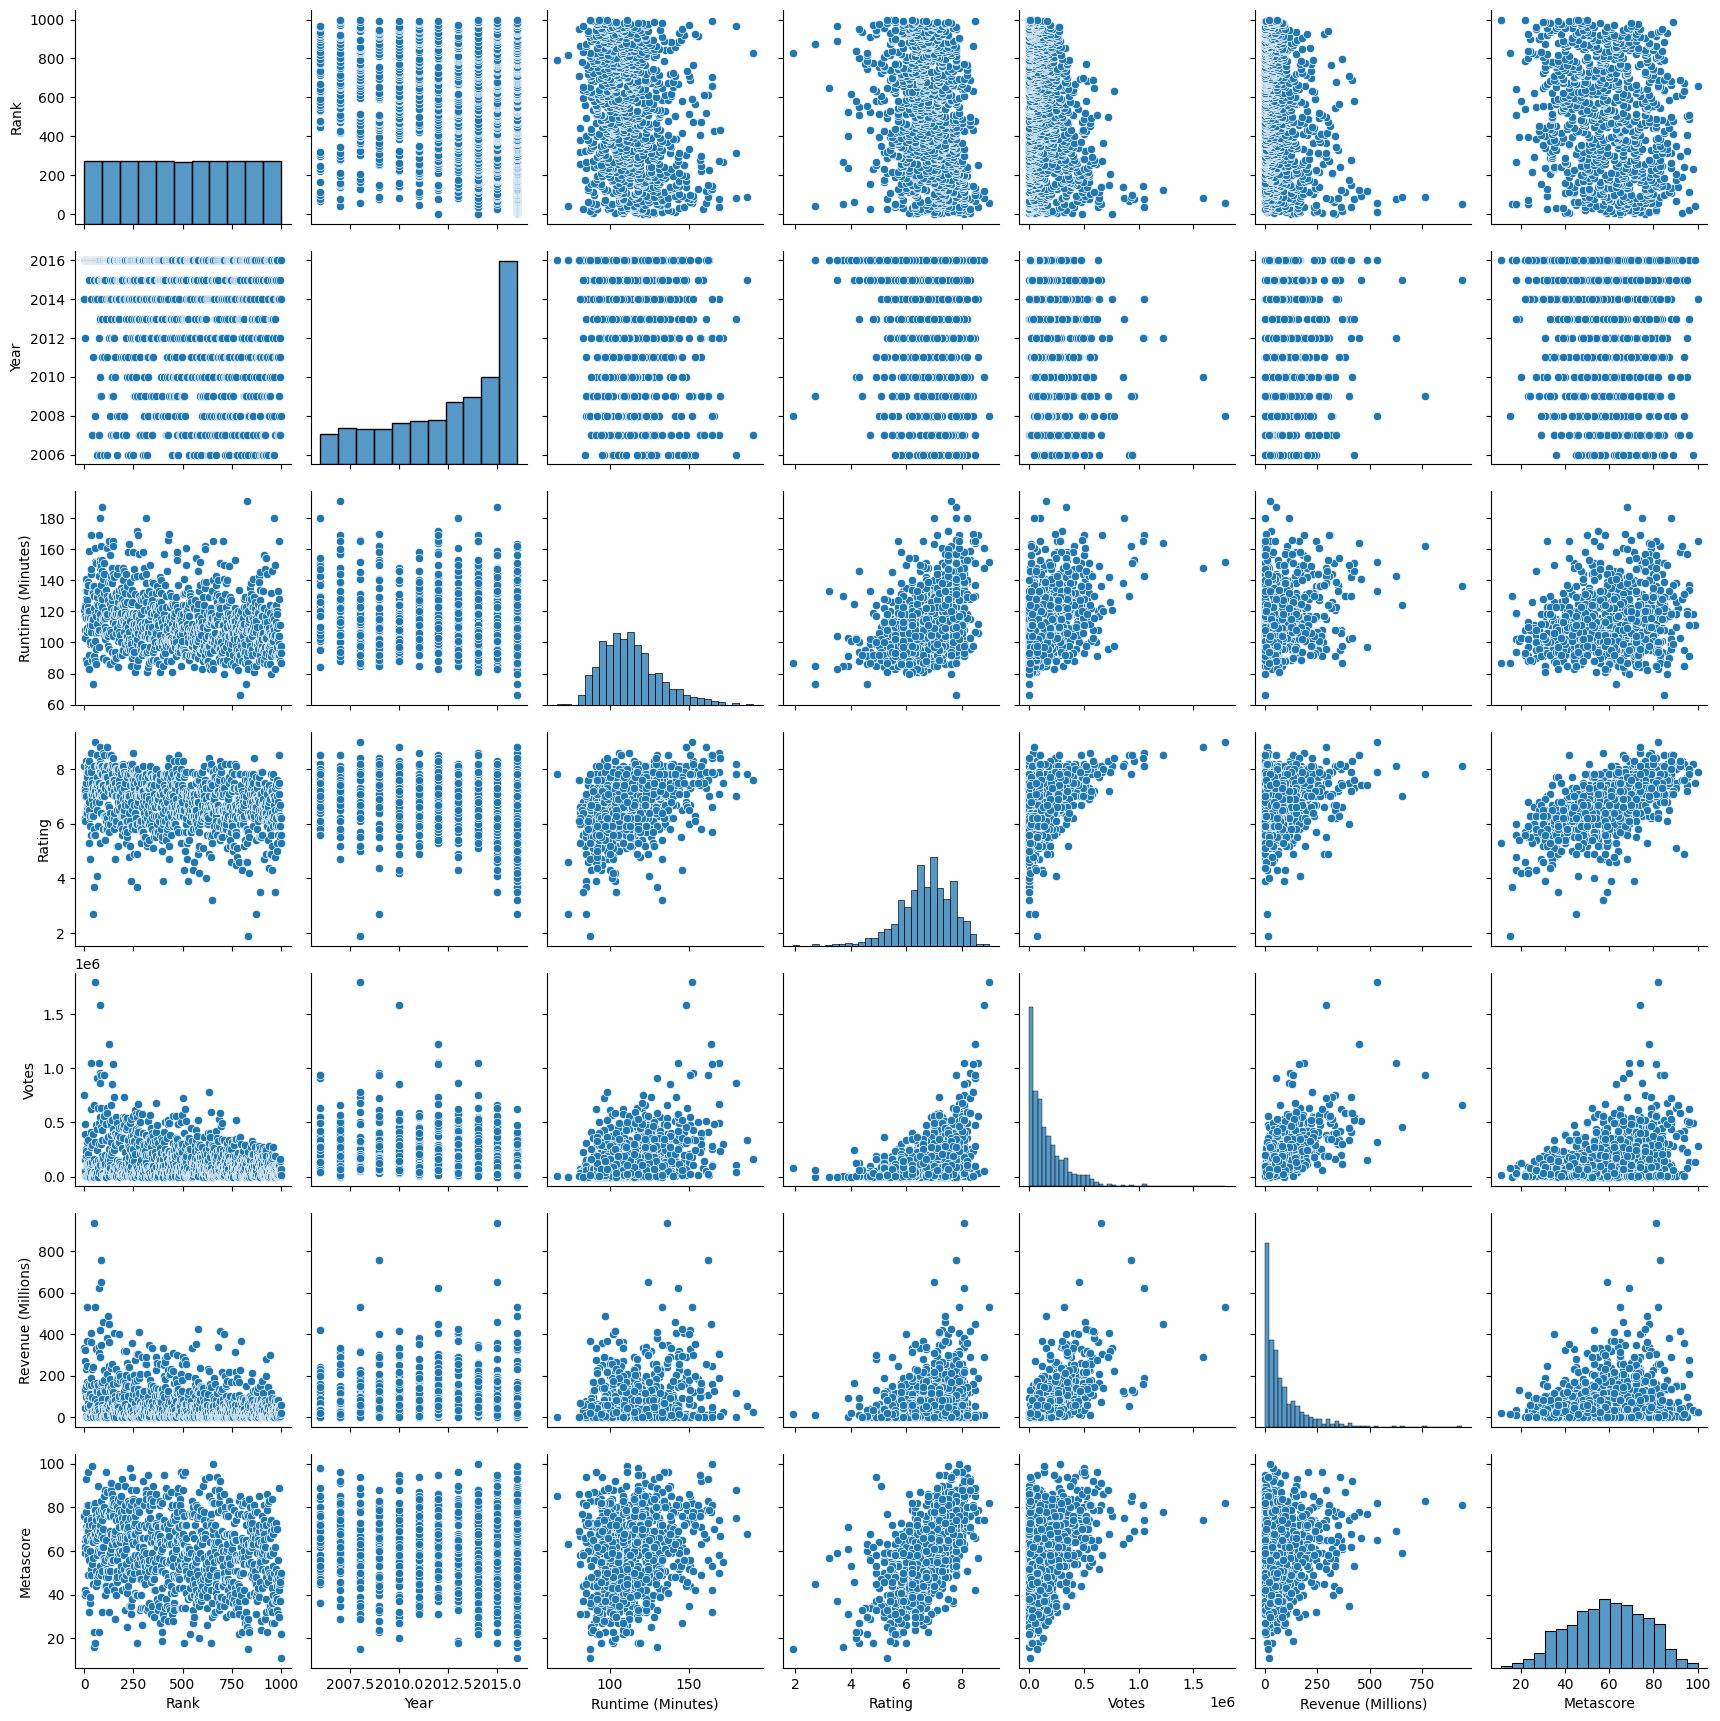

In [ ]:
sns.pairplot(data = df)

In [ ]:
# Objective 1 - Total number of movies released from 2006 to 2016
df.columns

Index(['Rank', 'Title', 'Genre', 'Director', 'Movie category', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

<Axes: ylabel='count'>

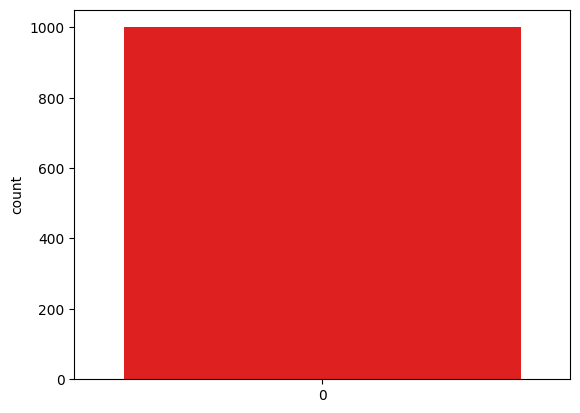

In [ ]:
# The countplot indicates that, the total movies listed in IMDB from 2006 to 2016 is 1000.
sns.countplot(data = df['Year'], color = 'r')

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<Axes: xlabel='Year', ylabel='Metascore'>

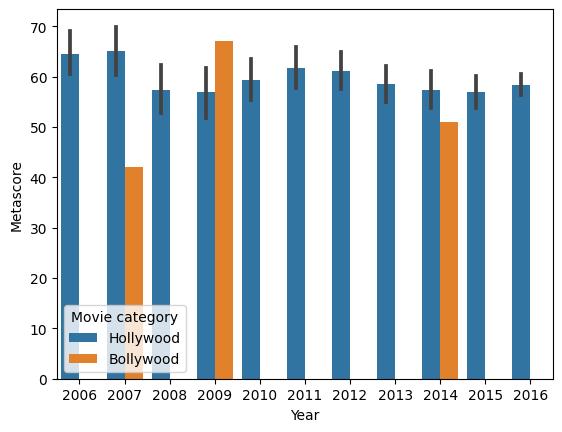

In [ ]:

sns.barplot(data = df, x = 'Year', y = 'Metascore', hue = 'Movie category')

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Year', ylabel='Revenue (Millions)'>

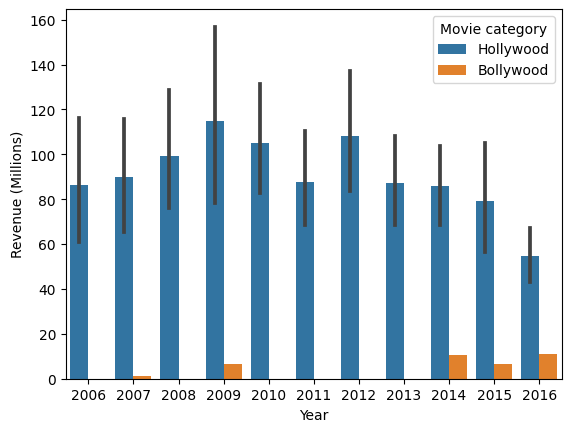

In [ ]:

sns.barplot(data = df, x = 'Year', y = 'Revenue (Millions)', hue = 'Movie category')

<Axes: xlabel='Year', ylabel='Votes'>

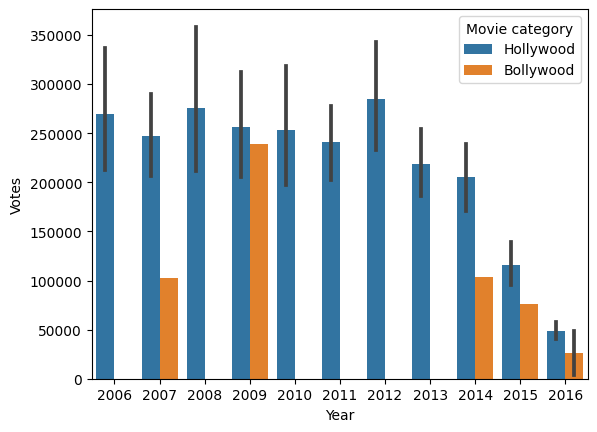

In [ ]:
sns.barplot(data = df, x = 'Year', y = 'Votes', hue = 'Movie category')

<Axes: xlabel='Year', ylabel='Rating'>

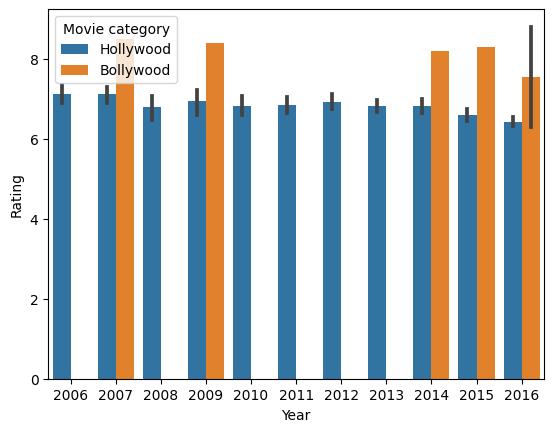

In [ ]:

sns.barplot(data = df, x = 'Year', y = 'Rating', hue = 'Movie category')

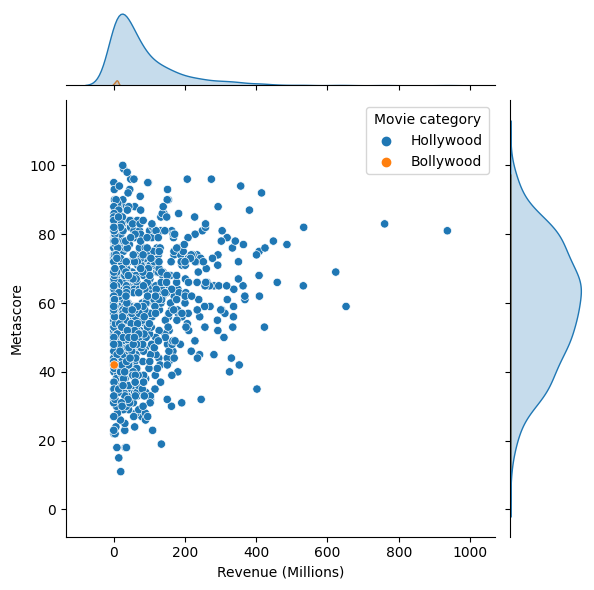

In [ ]:
# Revenue vs Metascore
sns.jointplot(data = df, x = 'Revenue (Millions)', y = 'Metascore', kind = 'scatter', hue = 'Movie category')

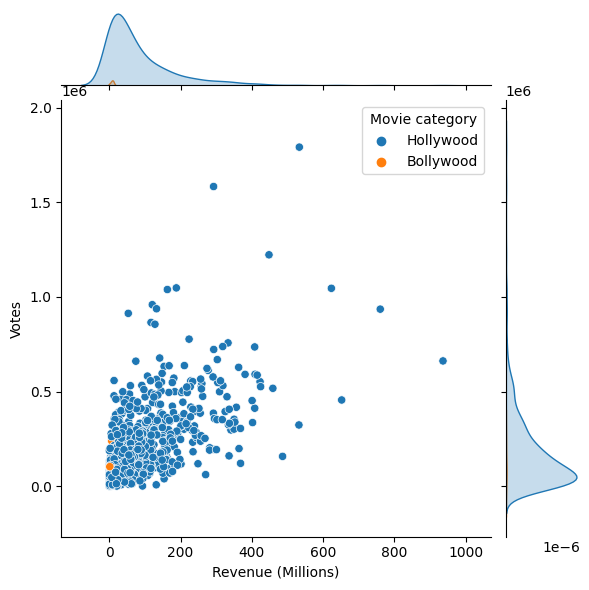

In [ ]:
sns.jointplot(data = df, x = 'Revenue (Millions)', y = 'Votes', hue = 'Movie category')

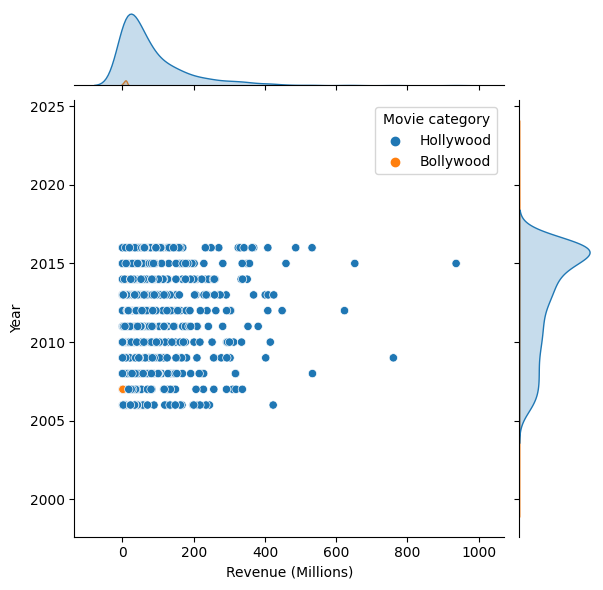

In [ ]:
sns.jointplot(data = df, x = 'Revenue (Millions)', y = 'Year', hue = 'Movie category')

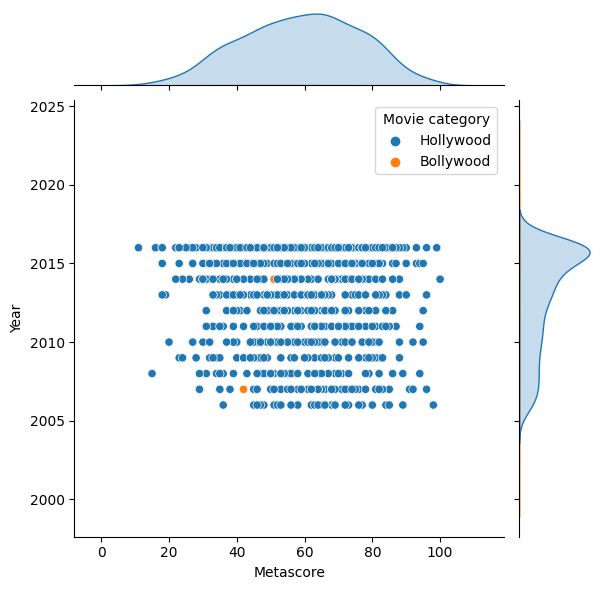

In [ ]:
sns.jointplot(data = df, x = 'Metascore', y = 'Year', hue = 'Movie category')

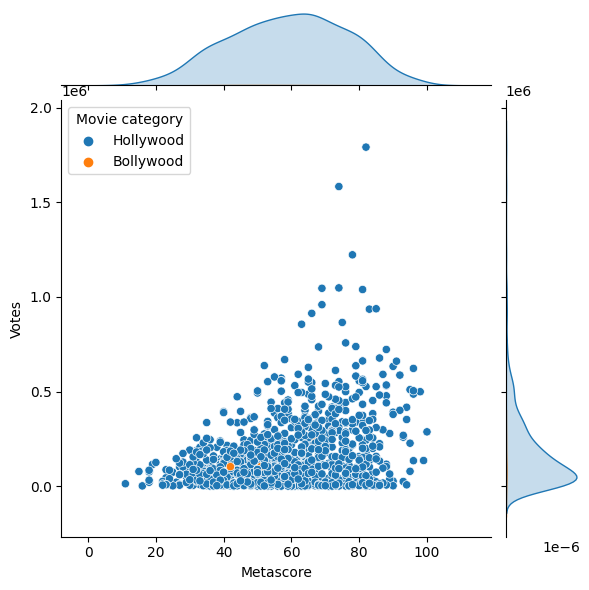

In [ ]:
sns.jointplot(data = df, x = 'Metascore', y = 'Votes', hue = 'Movie category')

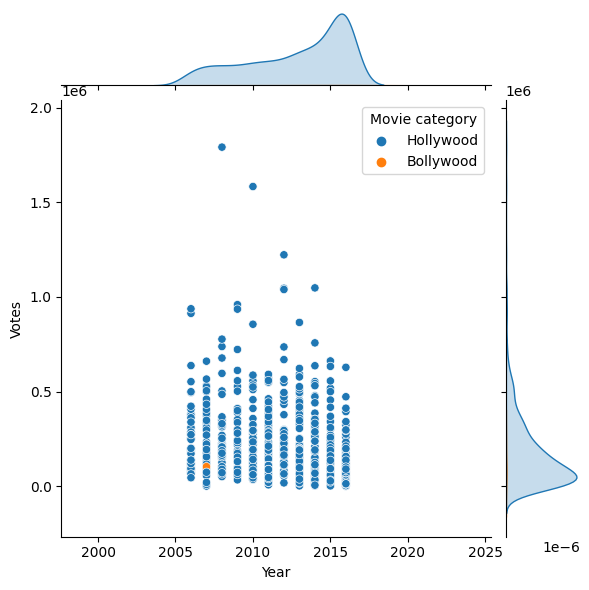

In [ ]:
sns.jointplot(data = df, x = 'Year', y = 'Votes', hue = 'Movie category')

In [ ]:
sns.jointplot(data = df, x = 'Revenue (Millions)', y = 'Votes', hue = 'Movie category')

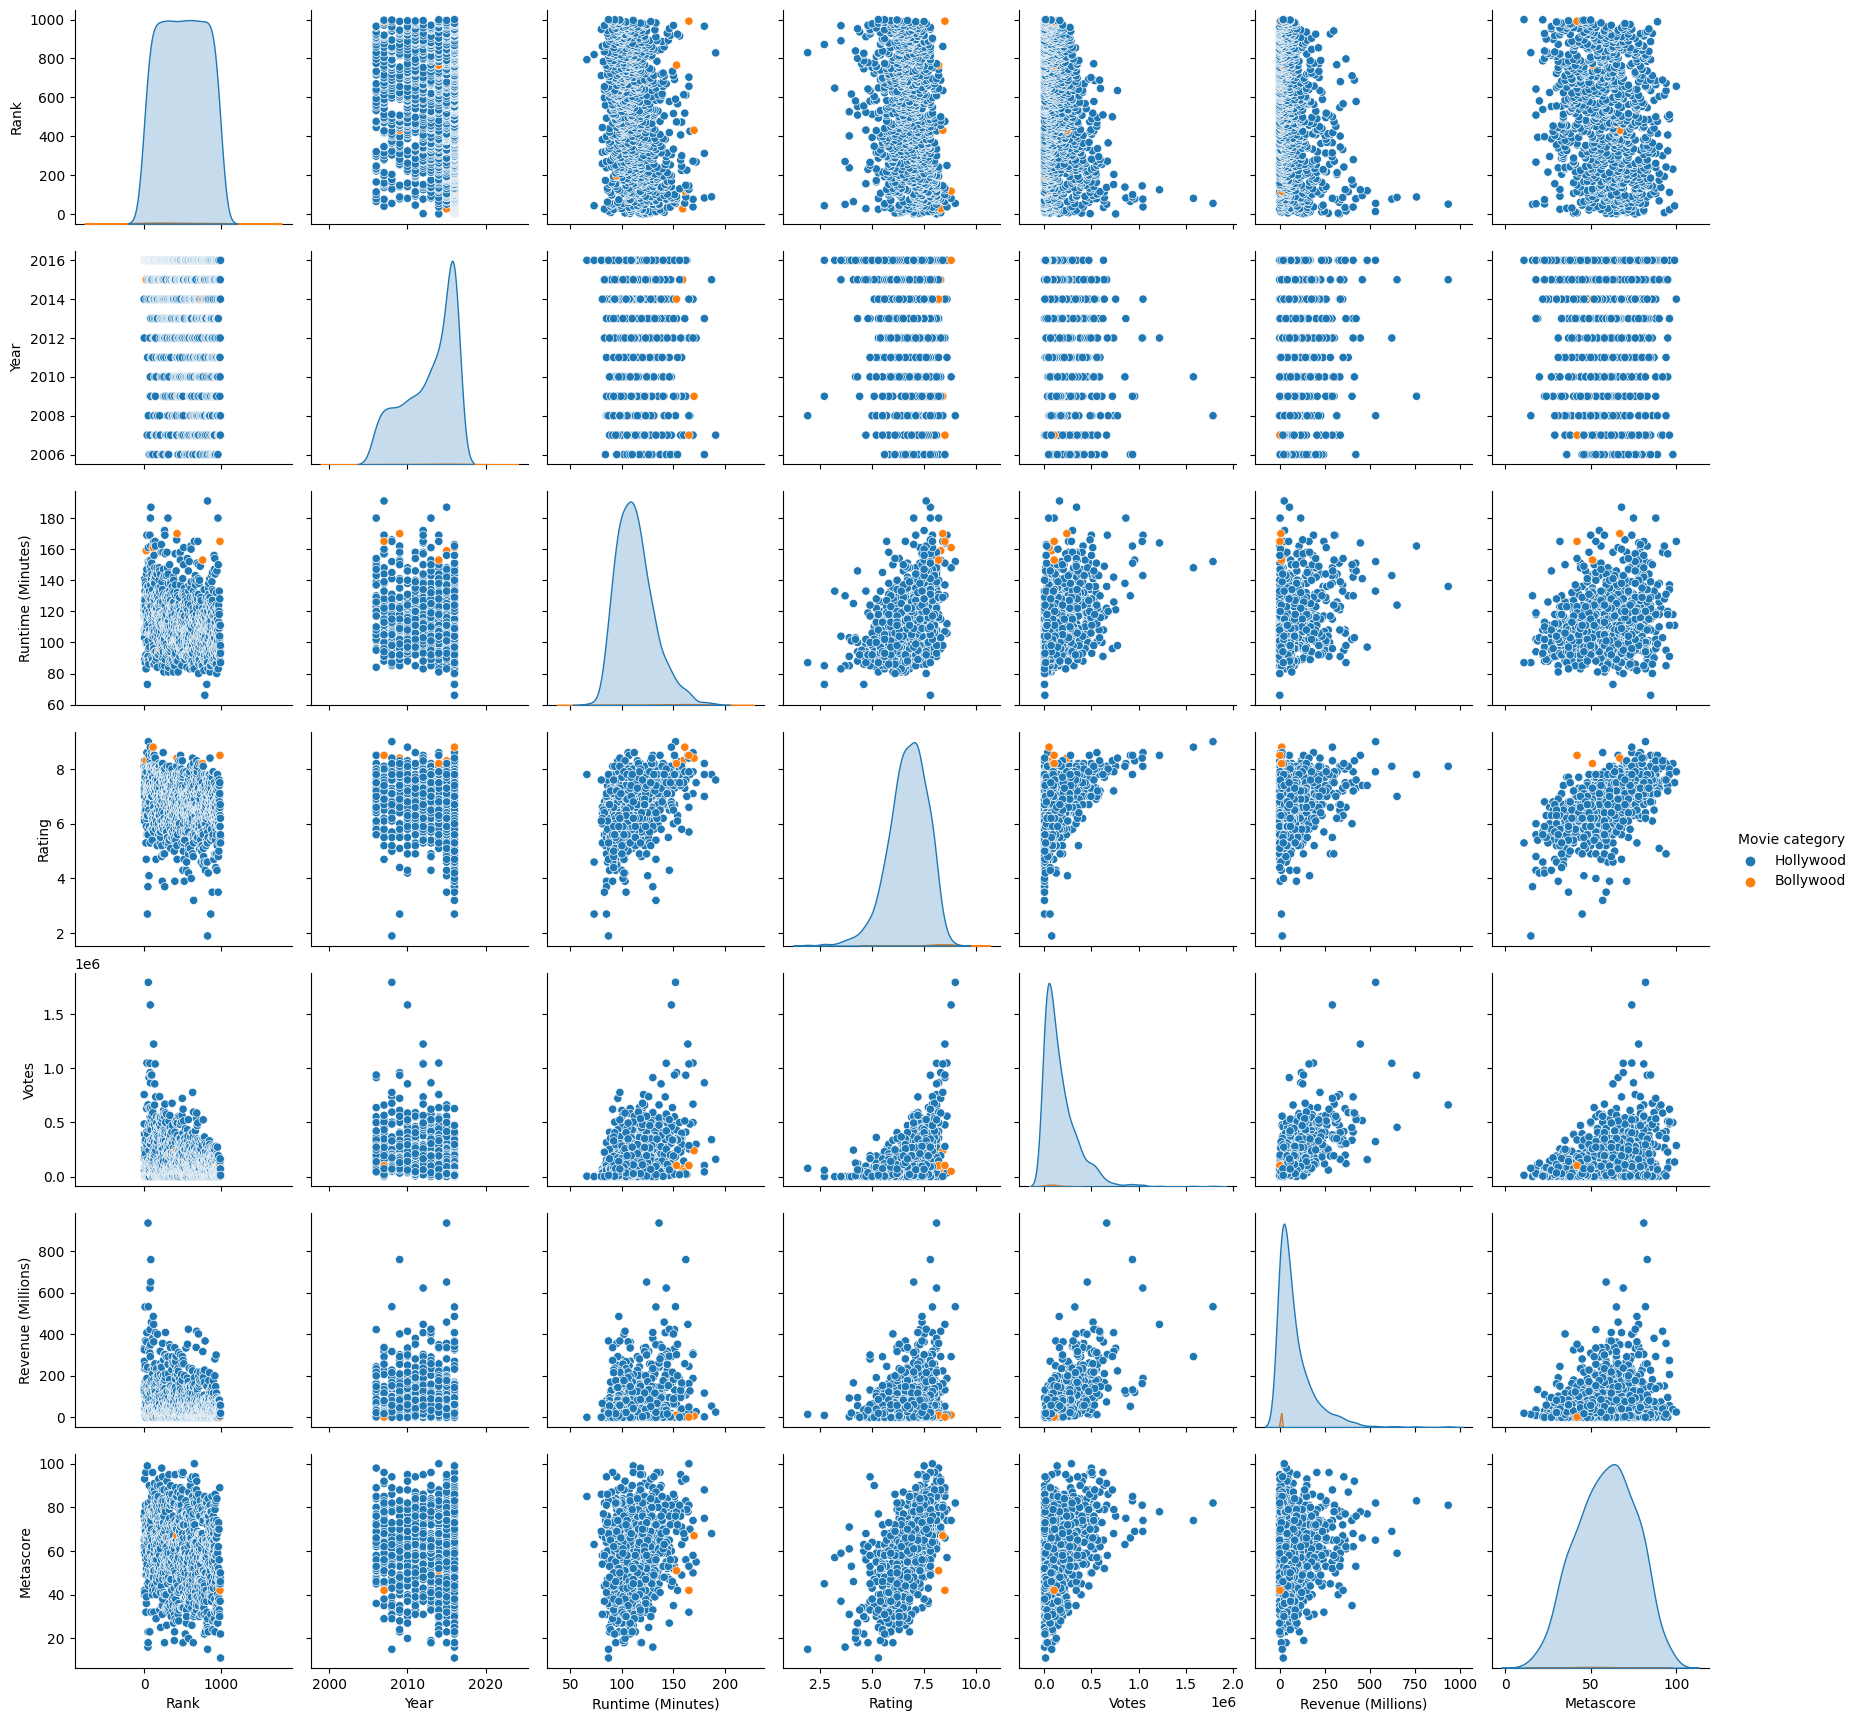

In [ ]:
sns.pairplot(data = df, hue = 'Movie category')

In [ ]:
# Distplot - Visualization of every int or float segments

<ipython-input-49-74d2016b5fad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Revenue (Millions)'])


<Axes: xlabel='Revenue (Millions)', ylabel='Density'>

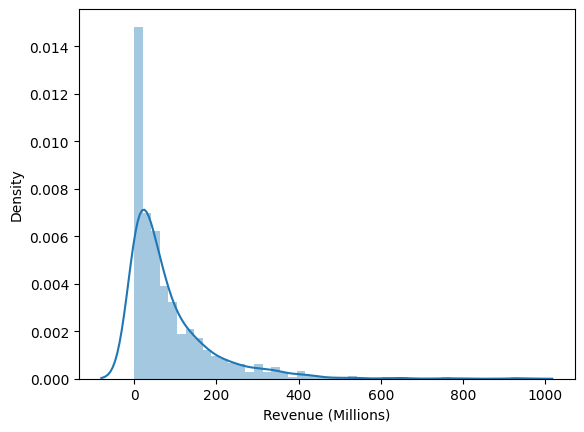

In [ ]:
sns.distplot(df['Revenue (Millions)'])

<ipython-input-50-38cdabe936cd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Votes'])


<Axes: xlabel='Votes', ylabel='Density'>

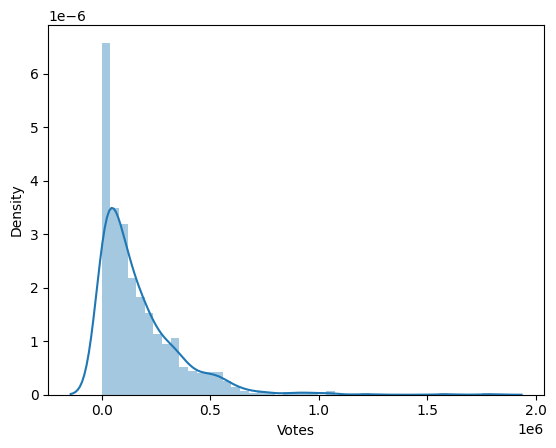

In [ ]:
sns.distplot(df['Votes'])

<ipython-input-53-1beb45e76234>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

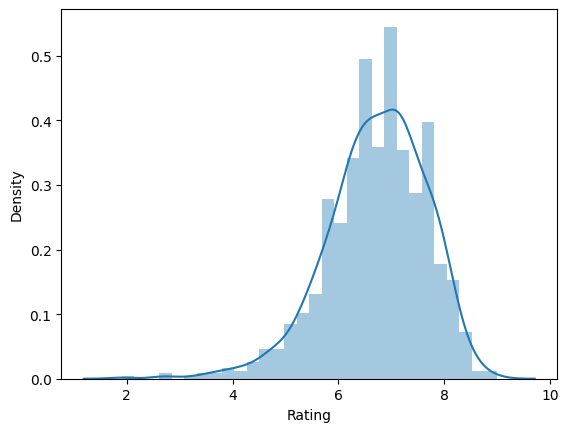

In [ ]:
sns.distplot(df['Rating'])

<ipython-input-54-7a9375e52fae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Metascore'])


<Axes: xlabel='Metascore', ylabel='Density'>

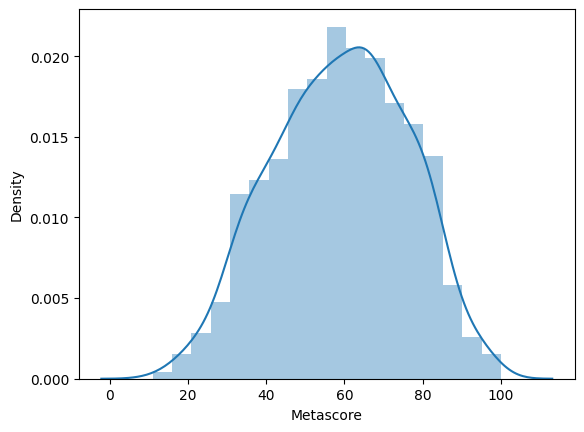

In [ ]:
sns.distplot(df['Metascore'])

<ipython-input-55-7b171d00278e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'])


<Axes: xlabel='Year', ylabel='Density'>

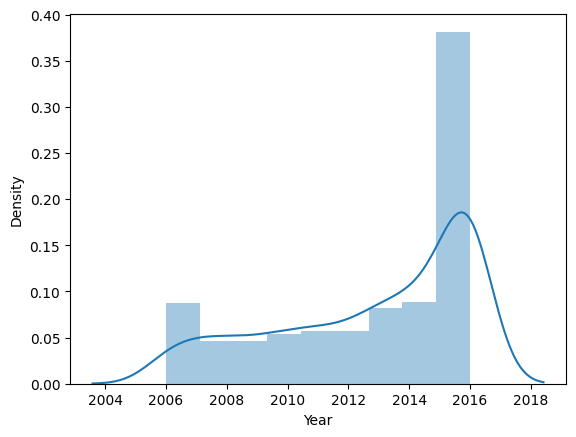

In [ ]:
sns.distplot(df['Year'])